# Artificial Neural Network

In [1]:
import pandas.api.types as ptypes
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
df=pd.read_csv("Data/Churn_Modelling.csv",delimiter=',')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# display columns in dataset
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
# display shape of dataset
print('dataset has {0} rows  and {1} column'.format(df.shape[0],df.shape[1])) 

dataset has 10000 rows  and 14 column


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# checking missing values
df.columns[df.isnull().any()]

Index([], dtype='object')

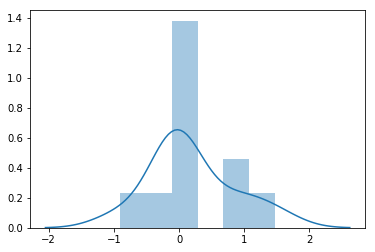

In [8]:
target = df.skew()
sb.distplot(target)

In [9]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

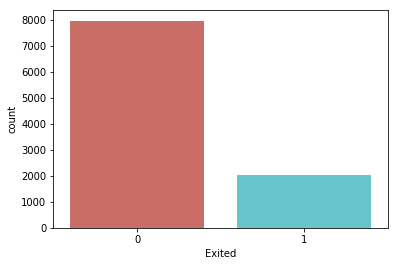

In [10]:
# plot subscription of yes and no
sb.countplot(x='Exited',  data=df, palette='hls')
plt.show()

In [11]:
df.duplicated().sum()

0

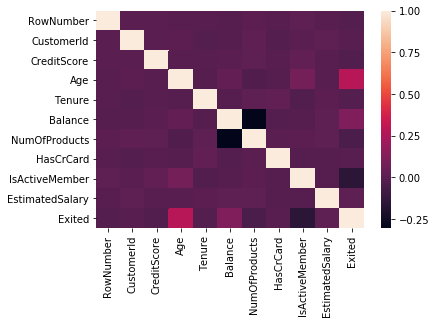

In [12]:
corr = df.corr()
sb.heatmap(corr)

In [13]:
print(corr['Exited'].sort_values(ascending=True)[:])

IsActiveMember    -0.156128
NumOfProducts     -0.047820
CreditScore       -0.027094
RowNumber         -0.016571
Tenure            -0.014001
HasCrCard         -0.007138
CustomerId        -0.006248
EstimatedSalary    0.012097
Balance            0.118533
Age                0.285323
Exited             1.000000
Name: Exited, dtype: float64


In [14]:
df.drop(['Surname','HasCrCard','Tenure','RowNumber','CreditScore','NumOfProducts','IsActiveMember'],axis=1, inplace=True)

In [15]:
# categorical data encoding 
df = pd.get_dummies(df)
df.head()

,CustomerId,Age,Balance,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15634602,42,0.00,101348.88,1,1,0,0,1,0
1,15647311,41,83807.86,112542.58,0,0,0,1,1,0
2,15619304,42,159660.80,113931.57,1,1,0,0,1,0
3,15701354,39,0.00,93826.63,0,1,0,0,1,0
4,15737888,43,125510.82,79084.10,0,0,0,1,1,0


In [16]:
df.shape

(10000, 10)

In [17]:
# split data into train and test
train,test = train_test_split(df,test_size=0.20,random_state=0)

In [18]:
# split train data into train and cross validation
train_data,cross_val = train_test_split(train,test_size=0.20,random_state=0)

In [19]:
# creating feature sets and label on train data
train_data_x  =  train_data.iloc[:,:-1].values
train_data_y = train_data.iloc[:,-1].values

In [20]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
sc = ss.fit(train_data_x)

In [21]:
train_data_x.shape,train_data_y.shape

((6400, 9), (6400,))

In [22]:
# create feature sets and label on cross validation
cross_val_x =  cross_val.iloc[:,:-1].values
cross_val_y = cross_val.iloc[:,-1].values

In [23]:
cross_val_x.shape,cross_val_y.shape

((1600, 9), (1600,))

In [24]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
sc_cv = ss.fit(cross_val_x)

# Tensorflow 

In [29]:
import tensorflow as tf

train_data_y = train_data_y.reshape(len(train_data_y), 1)
cross_val_y  = cross_val_y.reshape(len(cross_val_y),1)

# number of neuron for 3 hidden layers
n_nodes_hl1 = 500
n_nodes_hl2 = 500
n_nodes_hl3 = 500

n_classes = 2
batch_size = 100

x = tf.placeholder('float', [None, train_data_x.shape[1]])
y = tf.placeholder('float')


# here we have created a model
def neural_network_model(data):
#     (input  data * weights) + bais
# input will be number of nodes in hidden layer
    hidden_1_layer = {'weights':tf.Variable(tf.random_normal([(train_data_x.shape[1]), n_nodes_hl1])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}

    hidden_2_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}

    hidden_3_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))}

    output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3, n_classes])),
                    'biases':tf.Variable(tf.random_normal([n_classes])),}


#     (input  data * weights) + bais
    l1 = tf.add(tf.matmul(data,hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2,hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)

    output = tf.matmul(l3,output_layer['weights']) + output_layer['biases']
    print("output:",output)
    return output

def train_neural_network(x):
#     get prediction over train model
    prediction = neural_network_model(x)
#     calculate cost using reduce mean and  Computes the mean of elements across dimensions of a tensor
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y) )
#     minimize cost using AdamOptimizer its synonyms for stochastic gradient descent
    optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)
    
#     saver object creation
    saver = tf.train.Saver()
    
#     cycle of feed forward +  back propagation
    hm_epochs = 10
    with tf.Session() as sess:
#         session run to initialize all the variables
        sess.run(tf.global_variables_initializer())
        for epoch in range(hm_epochs):
            epoch_loss = 0
            for _ in range(10):
                """feed_dict is a  dictionary to pass numeric values to computational graph """
#                 c = sess.run(cost, feed_dict={x: train_data_x , y: train_data_y})
                _, c = sess.run([optimizer, cost], feed_dict={x: train_data_x , y: train_data_y})
                epoch_loss += c
            print('Epoch', epoch+1, 'completed out of',hm_epochs,'loss:',epoch_loss)
            
            """ # Evaluating tf.argmax(prediction, 1) gives a tensor whose evaluation will give array.
    # Evaluating tf.argmax(y, 1) gives a tensor whose evaluation will give array.
    # tf.equal(x, y, name=None) takes two tensors(x and y) as inputs
    and returns the truth value of (x == y) element-wise.
    # correct_prediction is a tensor whose evaluation will give a 1-D array of 0's and 1's."""
        
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
#         convert type of correct data into float type
        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))*100
        print('Accuracy:',accuracy.eval({x:train_data_x, y:train_data_y}))
        cross = accuracy.eval({x:cross_val_x, y:cross_val_y})
        print('cross accuracy:',cross)
#         saved_path = ""
#         if cross > 49:
#             saved_path = saver.save(sess,"tensorflow_pickle/tensorflow.ckpt")
# #             saver.save(ss,saved_path)
# #             saver.save(sc_cv,saved_path)
# #             saver.save(cost,saved_path)
# #             saver.save(optimizer,saved_path)
#             print("Model is saved in path: %s" %saved_path)
train_neural_network(x)

output: Tensor("add_19:0", shape=(?, 2), dtype=float32)
Epoch 1 completed out of 10 loss: 822129287168.0
Epoch 2 completed out of 10 loss: 644945948672.0
Epoch 3 completed out of 10 loss: 470330224640.0
Epoch 4 completed out of 10 loss: 296053825536.0
Epoch 5 completed out of 10 loss: 124559352832.0
Epoch 6 completed out of 10 loss: 28933700528.0
Epoch 7 completed out of 10 loss: 20051505856.0
Epoch 8 completed out of 10 loss: 11520210880.0
Epoch 9 completed out of 10 loss: 4813145832.0
Epoch 10 completed out of 10 loss: 2235037304.0
Accuracy: 66.984375
cross accuracy: 65.75
